# Micro Credit Project

### Data description

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.
The telecom industry are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days.
We need to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv('Data file.csv')
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
df.shape

(209593, 37)

209593 rows and 37 columns present.

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())
    

Unnamed: 0
[     1      2      3 ... 209591 209592 209593]
label
[0 1]
msisdn
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
aon
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
daily_decr30
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]
daily_decr90
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]
rental30
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
rental90
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]
last_rech_date_ma
[2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]
last_rech_date_da
[0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]
last_rech_amt_ma
[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  13

We can see only one category value in 'pcircle' column, so we can drop it. Along with pdate and unnamed as they provide no good info.

In [6]:
df.drop(['pcircle'],axis=1, inplace=True)
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0                 12              6.0                 0.0          2.0   
1                 12             12.0                 0.0          1.0   
2                  6              6.0                 0.0          1.0   
3                 12              6.0                 0.0          2.0   
4                 42              6.0                 0.0          7.0   
...              ...              ...                 ...          ...   
209588            12              6.0                 0.0          2.0   
209589            18              6.0                 0.0          3.0   
209590            42             12.0                 0.0          6.0   
209591            18             12.0                 0.0          3.0   
209592            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90       pdate  
0       29.000000  2016-07-20  
1        0.000000  2016-08-10  
2        0.000000  2016-08-19  
3        0.000000  2016-06-06  
4        2.333333  2016-06-22  
...           ...         ...  
209588   1.000000  2016-06-17  
209589   1.000000  2016-06-12  
209590   3.833333  2016-07-29  
209591  10.500000  2016-07-25  
209592   0.000000  2016-07-07  

[209593 rows x 36 columns]

In [7]:
df.drop(['pdate','Unnamed: 0'],axis=1, inplace=True)
df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0                 2            12              6.0                 0.0   
1                 1            12             12.0                 0.0   
2                 1             6              6.0                 0.0   
3                 2            12              6.0                 0.0   
4                 7            42              6.0                 0.0   
...             ...           ...              ...                 ...   
209588            2            12              6.0                 0.0   
209589            3            18              6.0                 0.0   
209590            4            42             12.0                 0.0   
209591            2            18             12.0                 0.0   
209592            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209

Now we can work on it. Label is our target column

In [8]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Column 'msisdn' is of object datatype.

In [10]:
df['msisdn']

0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209588    22758I85348
209589    95583I84455
209590    28556I85350
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 209593, dtype: object

'msisdn' column contains phone number, which we can drop as it plays no part in calculation.

In [11]:
df.drop(['msisdn'],axis=1, inplace=True)
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

In [12]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [13]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

No null values.

In [13]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

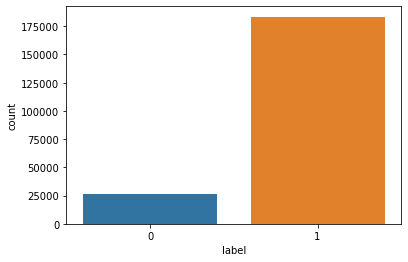

In [14]:
sns.countplot(df['label']);

We can see there is class imbalance. lets treat it.

### Downsampling

In [15]:
x= df.drop('label',axis=1)
y= df.label

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [16]:
x= pd.concat([x_train,y_train], axis=1)

yes=x[x.label==1]
no =x[x.label==0]

In [17]:
from sklearn.utils import resample

In [18]:
down= resample(yes, replace=False, n_samples=len(no),random_state=41)

In [19]:
downsampled= pd.concat([down,no])

In [20]:
downsampled

aon  daily_decr30  daily_decr90  rental30  rental90  \
198958    63.0     45.276667     45.276667    170.00    170.00   
124815   910.0  10584.000000  14439.120000   5966.57  13733.40   
171759  1024.0    800.000000   1000.000000      0.00      0.00   
50498    263.0     18.534000     18.534000     63.00     63.00   
189260   103.0    526.693333    530.800000    104.00    120.00   
...        ...           ...           ...       ...       ...   
108793   132.0     -0.233333     -0.233333    340.90    340.90   
173987   187.0      3.100000      3.100000   1029.90   1029.90   
514      795.0     10.200000     10.200000    739.62    739.62   
191358   121.0      0.533333      0.533333      2.00      2.00   
184495   114.0   1706.286667   1708.200000   4127.56   4956.50   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
198958                5.0                0.0              2309              4   
124815               12.0                0.0              2309              3   
171759                0.0                0.0                 0              0   
50498                 2.0                0.0              1539              2   
189260               14.0                0.0              1539              2   
...                   ...                ...               ...            ...   
108793                0.0                0.0                 0              0   
173987                0.0                0.0                 0              0   
514                   5.0                0.0               773              3   
191358                0.0                0.0                 0              0   
184495                5.0                0.0               770              2   

        fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
198958           4.0  ...             6              6.0                 0.0   
124815           8.0  ...            24             12.0                 0.0   
171759           0.0  ...             6              6.0                 0.0   
50498            0.0  ...             6              6.0                 0.0   
189260           9.0  ...             6              6.0                 0.0   
...              ...  ...           ...              ...                 ...   
108793           0.0  ...             6              6.0                 0.0   
173987           0.0  ...             6              6.0                 0.0   
514              2.0  ...             6              6.0                 0.0   
191358           0.0  ...             6              6.0                 0.0   
184495          21.0  ...            12             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
198958          1.0             6                6                 0.0   
124815          5.0            36               12                 0.0   
171759          1.0             6                6                 0.0   
50498           1.0             6                6                 0.0   
189260          1.0             6                6                 0.0   
...             ...           ...              ...                 ...   
108793          1.0             6                6                 0.0   
173987          1.0             6                6                 0.0   
514             1.0             6                6                 0.0   
191358          1.0             6                6                 0.0   
184495          1.0            12               12                 0.0   

        payback30  payback90  label  
198958        0.0       0.00      1  
124815        3.0       4.25      1  
171759        0.0       0.00      1  
50498         0.0       0.00      1  
189260        0.0       0.00      1  
...           ...        ...    ...  
108793        0.0       0.00      0  
173987        0.0       0.00      0  
514           0.0       0.00      0  
191358        0

In [21]:
downsampled['label'].value_counts()

1    18396
0    18396
Name: label, dtype: int64

In [22]:
downsampled.describe()

aon   daily_decr30   daily_decr90      rental30  \
count   36792.000000   36792.000000   36792.000000  36792.000000   
mean     8655.729819    3632.818521    4038.123170   2419.753532   
std     78446.594761    7669.481670    8938.524495   4077.323097   
min       -48.000000     -21.413333     -21.413333  -6750.920000   
25%       210.000000      12.596500      12.974500    167.187500   
50%       473.000000     520.833333     529.800000    874.225000   
75%       919.000000    3841.985000    3963.614750   2895.860000   
max    995029.562386  265926.000000  320630.000000  74214.440000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count   36792.000000       36792.000000       36792.000000      36792.000000   
mean     3007.929489        3802.166485        3628.535097       1726.244890   
std      5232.659919       54140.954007       53157.641807       2300.843366   
min     -6777.010000         -29.000000         -12.000000          0.000000   
25%       180.000000           1.000000           0.000000        770.000000   
50%      1025.625000           3.000000           0.000000        947.000000   
75%      3555.600000           8.000000           0.000000       1547.000000   
max    108091.040000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  \
count   36792.000000   36792.000000  ...  36792.000000     36792.000000   
mean        2.825125    3894.755453  ...     14.013862       270.716841   
std         3.688640   54361.231854  ...     14.535940      4231.248953   
min         0.000000       0.000000  ...      0.000000         0.000000   
25%         0.000000       0.000000  ...      6.000000         6.000000   
50%         2.000000       0.000000  ...      6.000000         6.000000   
75%         4.000000       4.000000  ...     18.000000         6.000000   
max        53.000000  996313.841199  ...    240.000000     99242.577481   

       medianamnt_loans30   cnt_loans90  amnt_loans90  maxamnt_loans90  \
count        36792.000000  36792.000000  36792.000000     36792.000000   
mean             0.043134     18.202292     17.628180         6.499511   
std              0.194481    229.162196     22.107952         1.782193   
min              0.000000      0.000000      0.000000         0.000000   
25%              0.000000      1.000000      6.000000         6.000000   
50%              0.000000      1.000000      6.000000         6.000000   
75%              0.000000      3.000000     18.000000         6.000000   
max              2.000000   4992.821587    408.000000        12.000000   

       medianamnt_loans90     payback30     payback90         label  
count        36792.000000  36792.000000  36792.000000  36792.000000  
mean             0.038011      2.927911      3.800039      0.500000  
std              0.181471      9.421698     11.093966      0.500007  
min              0.000000      0.000000      0.000000      0.000000  
25%              0.000000      0.000000      0.000000      0.000000  
50%              0.000000      0.000000      0.000000      0.500000  
75%              0.000000      2.666667      3.400000      1.000000  
max              2.000000    169.000000    169.000000      1.000000  

[8 rows x 33 columns]

In [23]:
downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36792 entries, 198958 to 184495
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   aon                   36792 non-null  float64
 1   daily_decr30          36792 non-null  float64
 2   daily_decr90          36792 non-null  float64
 3   rental30              36792 non-null  float64
 4   rental90              36792 non-null  float64
 5   last_rech_date_ma     36792 non-null  float64
 6   last_rech_date_da     36792 non-null  float64
 7   last_rech_amt_ma      36792 non-null  int64  
 8   cnt_ma_rech30         36792 non-null  int64  
 9   fr_ma_rech30          36792 non-null  float64
 10  sumamnt_ma_rech30     36792 non-null  float64
 11  medianamnt_ma_rech30  36792 non-null  float64
 12  medianmarechprebal30  36792 non-null  float64
 13  cnt_ma_rech90         36792 non-null  int64  
 14  fr_ma_rech90          36792 non-null  int64  
 15  sumamnt_ma_re

# Visualization

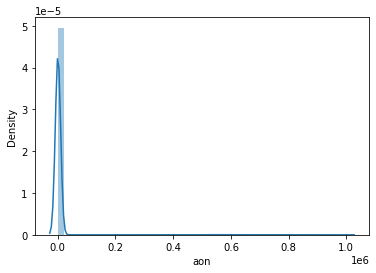

In [25]:
sns.distplot(downsampled['aon'])

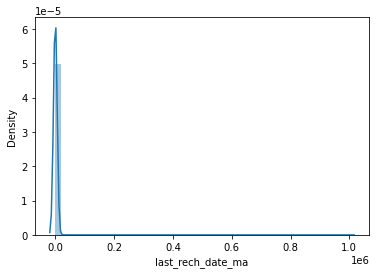

In [26]:
sns.distplot(downsampled['last_rech_date_ma'])

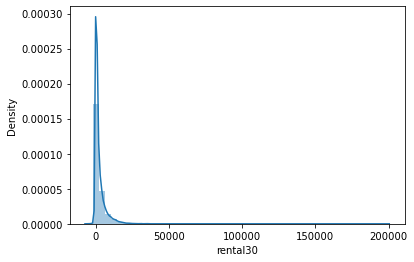

In [27]:
sns.distplot(downsampled['rental30'])

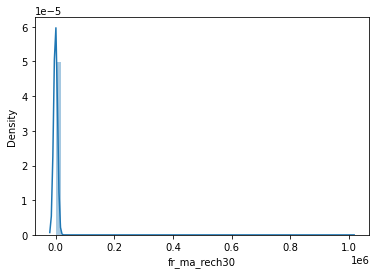

In [28]:
sns.distplot(downsampled['fr_ma_rech30'])

In [29]:
plt.scatter(downsampled['label'],downsampled['aon'])
plt.show()

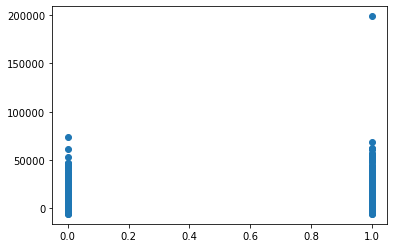

In [30]:
plt.scatter(downsampled['label'],downsampled['rental30'])
plt.show()

In [31]:
plt.scatter(downsampled['label'],downsampled['maxamnt_loans30'])
plt.show()

### Checking correlation

In [32]:
cor= downsampled.corr()
cor

aon  daily_decr30  daily_decr90  rental30  \
aon                   1.000000      0.009560      0.009640  0.001279   
daily_decr30          0.009560      1.000000      0.979970  0.367126   
daily_decr90          0.009640      0.979970      1.000000  0.360589   
rental30              0.001279      0.367126      0.360589  1.000000   
rental90              0.000658      0.401881      0.411551  0.964570   
last_rech_date_ma     0.007735     -0.003728     -0.003053 -0.003768   
last_rech_date_da    -0.006387      0.006474      0.006667  0.007546   
last_rech_amt_ma      0.002112      0.310777      0.296629  0.148877   
cnt_ma_rech30         0.004125      0.492757      0.470156  0.207876   
fr_ma_rech30         -0.002057      0.002057      0.001714  0.006175   
sumamnt_ma_rech30     0.005724      0.676517      0.647397  0.244225   
medianamnt_ma_rech30  0.005201      0.337822      0.322619  0.149649   
medianmarechprebal30  0.007461     -0.006426     -0.006655 -0.001864   
cnt_ma_rech90         0.004793      0.611301      0.612058  0.269716   
fr_ma_rech90          0.004247     -0.001896     -0.005633  0.004767   
sumamnt_ma_rech90     0.008163      0.780899      0.782074  0.294890   
medianamnt_ma_rech90  0.004535      0.293112      0.282458  0.137532   
medianmarechprebal90 -0.001876      0.061923      0.061194  0.040591   
cnt_da_rech30        -0.001312     -0.002284     -0.001925 -0.001650   
fr_da_rech30         -0.001874      0.010620      0.010654  0.002782   
cnt_da_rech90         0.004737      0.050901      0.044469  0.091617   
fr_da_rech90         -0.000322      0.018470      0.014843  0.068515   
cnt_loans30           0.005650      0.408159      0.384886  0.160878   
amnt_loans30          0.010509      0.503228      0.481976  0.206579   
maxamnt_loans30      -0.001380     -0.000258      0.000789 -0.002332   
medianamnt_loans30    0.005187      0.017086      0.021426 -0.005980   
cnt_loans90           0.007043      0.010602      0.013536  0.005048   
amnt_loans90          0.009532      0.587516      0.587997  0.260461   
maxamnt_loans90       0.006472      0.424030      0.420134  0.231302   
medianamnt_loans90    0.004220     -0.013151     -0.012086 -0.021491   
payback30            -0.003155      0.058416      0.050242  0.073370   
payback90            -0.002328      0.075863      0.067717  0.093945   
label                 0.000149      0.314744      0.314378  0.090012   

                      rental90  last_rech_date_ma  last_rech_date_da  \
aon                   0.000658           0.007735          -0.006387   
daily_decr30          0.401881          -0.003728           0.006474   
daily_decr90          0.411551          -0.003053           0.006667   
rental30              0.964570          -0.003768           0.007546   
rental90              1.000000          -0.003236           0.007899   
last_rech_date_ma    -0.003236           1.000000           0.004219   
last_rech_date_da     0.007899           0.004219           1.000000   
last_rech_amt_ma      0.146526          -0.006790           0.003383   
cnt_ma_rech30         0.224326          -0.005690           0.000712   
fr_ma_rech30          0.005216           0.001412          -0.004608   
sumamnt_ma_rech30     0.248693          -0.009775           0.002575   
medianamnt_ma_rech30  0.144045          -0.007680           0.005368   
medianmarechprebal30  0.000263          -0.001914          -0.004521   
cnt_ma_rech90         0.317141          -0.002928           0.003335   
fr_ma_rech90          0.004676          -0.002586           0.002560   
sumamnt_ma_rech90     0.325239          -0.007200           0.005093   
medianamnt_ma_rech90  0.132332          -0.005274           0.003642   
medianmarechprebal90  0.042772          -0.003917           0.037867   
cnt_da_rech30        -0.000863          -0.004194          -0.004106   
fr_da_rech30          0.002553          -0.004773          -0.000248   
cnt_da_rech90         0.079742          -0.003933          -0.0009

In [33]:
plt.figure(figsize=[20,9])
sns.heatmap(cor, annot=True, linewidth=1);
plt.title('Correlation matrix')
plt.show()

In [34]:
cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.431577
cnt_ma_rech30           0.421467
sumamnt_ma_rech90       0.379788
sumamnt_ma_rech30       0.370590
amnt_loans90            0.368401
amnt_loans30            0.356738
cnt_loans30             0.354648
daily_decr30            0.314744
daily_decr90            0.314378
medianamnt_ma_rech30    0.229606
last_rech_amt_ma        0.208693
medianamnt_ma_rech90    0.191226
maxamnt_loans90         0.147678
fr_ma_rech90            0.129205
rental90                0.123898
rental30                0.090012
medianamnt_loans30      0.080071
medianmarechprebal90    0.078863
payback90               0.076331
payback30               0.072811
medianamnt_loans90      0.060219
cnt_da_rech30           0.009690
fr_ma_rech30            0.005662
cnt_da_rech90           0.005172
maxamnt_loans30         0.002551
cnt_loans90             0.002108
fr_da_rech30            0.001703
last_rech_date_da       0.001676
aon                     0.000149
last_rech_

Many columns have a negative correlation. lets check for outliers and skewness.

### Checking outliers

In [35]:
downsampled.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As there are many columns, lets split it in two.

In [36]:
x.iloc[:,0:17].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [37]:
x.iloc[:,17:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Many outliers present. lets remove them using IQR.

In [24]:
q1= downsampled.quantile(0.25)
q1

aon                     210.0000
daily_decr30             12.5965
daily_decr90             12.9745
rental30                167.1875
rental90                180.0000
last_rech_date_ma         1.0000
last_rech_date_da         0.0000
last_rech_amt_ma        770.0000
cnt_ma_rech30             0.0000
fr_ma_rech30              0.0000
sumamnt_ma_rech30         0.0000
medianamnt_ma_rech30      0.0000
medianmarechprebal30      0.0000
cnt_ma_rech90             1.0000
fr_ma_rech90              0.0000
sumamnt_ma_rech90       773.0000
medianamnt_ma_rech90    770.0000
medianmarechprebal90      1.0000
cnt_da_rech30             0.0000
fr_da_rech30              0.0000
cnt_da_rech90             0.0000
fr_da_rech90              0.0000
cnt_loans30               1.0000
amnt_loans30              6.0000
maxamnt_loans30           6.0000
medianamnt_loans30        0.0000
cnt_loans90               1.0000
amnt_loans90              6.0000
maxamnt_loans90           6.0000
medianamnt_loans90        0.0000
payback30 

In [25]:
q3= downsampled.quantile(0.75)
q3

aon                       919.000000
daily_decr30             3841.985000
daily_decr90             3963.614750
rental30                 2895.860000
rental90                 3555.600000
last_rech_date_ma           8.000000
last_rech_date_da           0.000000
last_rech_amt_ma         1547.000000
cnt_ma_rech30               4.000000
fr_ma_rech30                4.000000
sumamnt_ma_rech30        7026.000000
medianamnt_ma_rech30     1543.000000
medianmarechprebal30       63.500000
cnt_ma_rech90               6.000000
fr_ma_rech90                7.000000
sumamnt_ma_rech90       10335.500000
medianamnt_ma_rech90     1547.000000
medianmarechprebal90       64.000000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 3.000000
amnt_loans30               18.000000
maxamnt_loans30             6.000000
medianamnt_loans30          0.000000
cnt_loans90                 3.000000
a

In [26]:
iqr= q3-q1
iqr

aon                      709.000000
daily_decr30            3829.388500
daily_decr90            3950.640250
rental30                2728.672500
rental90                3375.600000
last_rech_date_ma          7.000000
last_rech_date_da          0.000000
last_rech_amt_ma         777.000000
cnt_ma_rech30              4.000000
fr_ma_rech30               4.000000
sumamnt_ma_rech30       7026.000000
medianamnt_ma_rech30    1543.000000
medianmarechprebal30      63.500000
cnt_ma_rech90              5.000000
fr_ma_rech90               7.000000
sumamnt_ma_rech90       9562.500000
medianamnt_ma_rech90     777.000000
medianmarechprebal90      63.000000
cnt_da_rech30              0.000000
fr_da_rech30               0.000000
cnt_da_rech90              0.000000
fr_da_rech90               0.000000
cnt_loans30                2.000000
amnt_loans30              12.000000
maxamnt_loans30            0.000000
medianamnt_loans30         0.000000
cnt_loans90                2.000000
amnt_loans90              12

In [27]:
new_df= downsampled[((downsampled<(q1-(1.5*iqr))) | (downsampled>(q3+(1.5*iqr)))).any(axis=1)]
new_df

aon  daily_decr30  daily_decr90  rental30  rental90  \
124815     910.000000  10584.000000  14439.120000   5966.57  13733.40   
37686      170.000000    242.293333    242.293333   1387.96   1387.96   
105062     500.000000   6667.000000   6740.900000   5952.56   7948.16   
115292     869.000000   2074.149333   2086.530000     48.00     90.00   
201304     106.000000   3200.000000   3208.290000   9802.15  14483.33   
...               ...           ...           ...       ...       ...   
79445      383.000000   4840.000000   4840.000000  19543.29  19543.29   
2932       697.000000  12056.191667  12065.230000    445.96    475.16   
158634     336.000000     14.000000     14.000000    216.60    216.60   
123648  729190.444574      7.900000      7.900000     30.00     30.00   
184495     114.000000   1706.286667   1708.200000   4127.56   4956.50   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
124815               12.0                0.0              2309              3   
37686                 1.0                0.0              2309             16   
105062                4.0                0.0              4917              1   
115292               34.0                0.0              3178              0   
201304                5.0                0.0               770              5   
...                   ...                ...               ...            ...   
79445                 2.0                0.0               770              3   
2932                  2.0                0.0              5787              1   
158634               35.0                0.0               773              0   
123648                5.0                0.0              1539              1   
184495                5.0                0.0               770              2   

        fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
124815           8.0  ...            24             12.0                 0.0   
37686            1.0  ...            18              6.0                 0.0   
105062           0.0  ...            12              6.0                 0.0   
115292           0.0  ...             6              6.0                 0.0   
201304           3.0  ...            12              6.0                 0.0   
...              ...  ...           ...              ...                 ...   
79445            2.0  ...            18              6.0                 0.0   
2932             0.0  ...            12              6.0                 0.0   
158634           0.0  ...             6              6.0                 0.0   
123648           0.0  ...             6              6.0                 0.0   
184495          21.0  ...            12             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
124815          5.0            36               12                 0.0   
37686           3.0            18                6                 0.0   
105062          4.0            24                6                 0.0   
115292          1.0             6                6                 0.0   
201304          2.0            12                6                 0.0   
...             ...           ...              ...                 ...   
79445           3.0            18                6                 0.0   
2932            2.0            12                6                 0.0   
158634          1.0             6                6                 0.0   
123648          1.0             6                6                 0.0   
184495          1.0            12               12                 0.0   

        payback30  payback90  label  
124815   3.000000   4.250000      1  
37686    1.500000   1.500000      1  
105062   0.000000  10.250000      1  
115292   0.000000   0.000000      1  
201304   0.000000   0.000000      1  
...           ...        ...    ...  
79445   47.666667  47.666667      0  
2932     0.000

In [28]:
downsampled.shape

(36792, 33)

In [29]:
new_df.shape

(23940, 33)

In [30]:
loss_percent=(36792-23940)/36792*100
loss_percent

34.93150684931507

Too much data loss. lets try using z score

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(downsampled))
print(np.where(z>3))

(array([    1,     5,     9, ..., 36786, 36791, 36791], dtype=int64), array([28,  8, 14, ...,  0, 14, 28], dtype=int64))


In [32]:
df_new= downsampled[(z<3).all(axis=1)]
print(downsampled.shape)
print(df_new.shape)

(36792, 33)
(26439, 33)


In [34]:
loss_percent=(36792-26439)/36792*100
loss_percent

28.139269406392692

Still large dataloss. lets try differently

In [88]:
q1= downsampled.quantile(0.43)
q3= downsampled.quantile(0.61)

In [89]:
iqr= q3-q1

df_new= downsampled[((downsampled<(q1-(1.5*iqr))) | (downsampled>(q3+(1.5*iqr)))).any(axis=1)]
df_new

aon  daily_decr30  daily_decr90  rental30  rental90  \
198958      63.000000     45.276667     45.276667    170.00    170.00   
124815     910.000000  10584.000000  14439.120000   5966.57  13733.40   
171759    1024.000000    800.000000   1000.000000      0.00      0.00   
189260     103.000000    526.693333    530.800000    104.00    120.00   
37686      170.000000    242.293333    242.293333   1387.96   1387.96   
...               ...           ...           ...       ...       ...   
123648  729190.444574      7.900000      7.900000     30.00     30.00   
108793     132.000000     -0.233333     -0.233333    340.90    340.90   
173987     187.000000      3.100000      3.100000   1029.90   1029.90   
191358     121.000000      0.533333      0.533333      2.00      2.00   
184495     114.000000   1706.286667   1708.200000   4127.56   4956.50   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
198958                5.0                0.0              2309              4   
124815               12.0                0.0              2309              3   
171759                0.0                0.0                 0              0   
189260               14.0                0.0              1539              2   
37686                 1.0                0.0              2309             16   
...                   ...                ...               ...            ...   
123648                5.0                0.0              1539              1   
108793                0.0                0.0                 0              0   
173987                0.0                0.0                 0              0   
191358                0.0                0.0                 0              0   
184495                5.0                0.0               770              2   

        fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
198958           4.0  ...             6              6.0                 0.0   
124815           8.0  ...            24             12.0                 0.0   
171759           0.0  ...             6              6.0                 0.0   
189260           9.0  ...             6              6.0                 0.0   
37686            1.0  ...            18              6.0                 0.0   
...              ...  ...           ...              ...                 ...   
123648           0.0  ...             6              6.0                 0.0   
108793           0.0  ...             6              6.0                 0.0   
173987           0.0  ...             6              6.0                 0.0   
191358           0.0  ...             6              6.0                 0.0   
184495          21.0  ...            12             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
198958          1.0             6                6                 0.0   
124815          5.0            36               12                 0.0   
171759          1.0             6                6                 0.0   
189260          1.0             6                6                 0.0   
37686           3.0            18                6                 0.0   
...             ...           ...              ...                 ...   
123648          1.0             6                6                 0.0   
108793          1.0             6                6                 0.0   
173987          1.0             6                6                 0.0   
191358          1.0             6                6                 0.0   
184495          1.0            12               12                 0.0   

        payback30  payback90  label  
198958        0.0       0.00      1  
124815        3.0       4.25      1  
171759        0.0       0.00      1  
189260        0.0       0.00      1  
37686         1.5       1.50      1  
...           ...        ...    ...  
123648        0.0       0.00      0  
108793        

In [90]:
downsampled.shape

(36792, 33)

In [91]:
df_new.shape

(35395, 33)

In [92]:
loss_percent=(36792-35395)/36792*100
loss_percent

3.797021091541639

In [93]:
df_new

aon  daily_decr30  daily_decr90  rental30  rental90  \
198958      63.000000     45.276667     45.276667    170.00    170.00   
124815     910.000000  10584.000000  14439.120000   5966.57  13733.40   
171759    1024.000000    800.000000   1000.000000      0.00      0.00   
189260     103.000000    526.693333    530.800000    104.00    120.00   
37686      170.000000    242.293333    242.293333   1387.96   1387.96   
...               ...           ...           ...       ...       ...   
123648  729190.444574      7.900000      7.900000     30.00     30.00   
108793     132.000000     -0.233333     -0.233333    340.90    340.90   
173987     187.000000      3.100000      3.100000   1029.90   1029.90   
191358     121.000000      0.533333      0.533333      2.00      2.00   
184495     114.000000   1706.286667   1708.200000   4127.56   4956.50   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
198958                5.0                0.0              2309              4   
124815               12.0                0.0              2309              3   
171759                0.0                0.0                 0              0   
189260               14.0                0.0              1539              2   
37686                 1.0                0.0              2309             16   
...                   ...                ...               ...            ...   
123648                5.0                0.0              1539              1   
108793                0.0                0.0                 0              0   
173987                0.0                0.0                 0              0   
191358                0.0                0.0                 0              0   
184495                5.0                0.0               770              2   

        fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
198958           4.0  ...             6              6.0                 0.0   
124815           8.0  ...            24             12.0                 0.0   
171759           0.0  ...             6              6.0                 0.0   
189260           9.0  ...             6              6.0                 0.0   
37686            1.0  ...            18              6.0                 0.0   
...              ...  ...           ...              ...                 ...   
123648           0.0  ...             6              6.0                 0.0   
108793           0.0  ...             6              6.0                 0.0   
173987           0.0  ...             6              6.0                 0.0   
191358           0.0  ...             6              6.0                 0.0   
184495          21.0  ...            12             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
198958          1.0             6                6                 0.0   
124815          5.0            36               12                 0.0   
171759          1.0             6                6                 0.0   
189260          1.0             6                6                 0.0   
37686           3.0            18                6                 0.0   
...             ...           ...              ...                 ...   
123648          1.0             6                6                 0.0   
108793          1.0             6                6                 0.0   
173987          1.0             6                6                 0.0   
191358          1.0             6                6                 0.0   
184495          1.0            12               12                 0.0   

        payback30  payback90  label  
198958        0.0       0.00      1  
124815        3.0       4.25      1  
171759        0.0       0.00      1  
189260        0.0       0.00      1  
37686         1.5       1.50      1  
...           ...        ...    ...  
123648        0.0       0.00      0  
108793        

### Checking skewness

In [94]:
df_new.skew()

aon                      9.753323
daily_decr30             5.525613
daily_decr90             5.826872
rental30                 3.886097
rental90                 4.039490
last_rech_date_ma       14.424453
last_rech_date_da       14.787752
last_rech_amt_ma         5.099554
cnt_ma_rech30            2.889095
fr_ma_rech30            14.065190
sumamnt_ma_rech30        5.508686
medianamnt_ma_rech30     4.762624
medianmarechprebal30    13.445658
cnt_ma_rech90            3.299847
fr_ma_rech90             2.529233
sumamnt_ma_rech90        4.739869
medianamnt_ma_rech90     4.986350
medianmarechprebal90    42.899115
cnt_da_rech30           18.056693
fr_da_rech30            14.454497
cnt_da_rech90           27.018378
fr_da_rech90            24.518060
cnt_loans30              3.075612
amnt_loans30             3.348230
maxamnt_loans30         17.479957
medianamnt_loans30       4.944547
cnt_loans90             15.955530
amnt_loans90             3.864591
maxamnt_loans90          2.248571
medianamnt_loa

All the columns have high skewness. lets treat them

In [95]:
x= df_new.drop('label', axis=1)
y= df_new['label']

from sklearn.preprocessing import power_transform

In [96]:
df2= power_transform(x)
df3= pd.DataFrame(df2, columns=x.columns)
df3

aon  daily_decr30  daily_decr90  rental30  rental90  \
0     -0.335452     -0.615395     -0.614206 -0.560930 -0.557395   
1      0.115696      1.256539      1.366050  0.921284  1.929474   
2      0.147227      0.196085      0.260411 -0.639601 -0.623986   
3     -0.281189      0.056855      0.050516 -0.587669 -0.574220   
4     -0.215066     -0.181481     -0.185998 -0.179890 -0.242056   
...         ...           ...           ...       ...       ...   
35390  7.243613     -0.959846     -0.956451 -0.621594 -0.608523   
35391 -0.249934     -1.348206     -1.345533 -0.498217 -0.505039   
35392 -0.201090     -1.097035     -1.093457 -0.281690 -0.325832   
35393 -0.261215     -1.251609     -1.248383 -0.637978 -0.622569   
35394 -0.268740      0.469554      0.452104  0.506646  0.473421   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               0.027143          -0.101101          0.655757       0.781517   
1               0.126480          -0.101101          0.655757       0.527203   
2              -0.142620          -0.101101         -1.655889      -1.340088   
3               0.146996          -0.101101          0.368728       0.181813   
4              -0.085518          -0.101101          0.655757       1.988193   
...                  ...                ...               ...            ...   
35390           0.027143          -0.101101          0.368728      -0.340659   
35391          -0.142620          -0.101101         -1.655889      -1.340088   
35392          -0.142620          -0.101101         -1.655889      -1.340088   
35393          -0.142620          -0.101101         -1.655889      -1.340088   
35394           0.027143          -0.101101         -0.049368       0.181813   

       fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          0.968695  ...    -0.720618     -0.703530        -0.099348   
1          1.320886  ...     0.953600      1.113142         1.388364   
2         -0.895780  ...    -0.720618     -0.703530        -0.099348   
3          1.372421  ...    -0.720618     -0.703530        -0.099348   
4          0.118591  ...     0.953600      0.754872        -0.099348   
...             ...  ...          ...           ...              ...   
35390     -0.895780  ...    -0.720618     -0.703530        -0.099348   
35391     -0.895780  ...    -0.720618     -0.703530        -0.099348   
35392     -0.895780  ...    -0.720618     -0.703530        -0.099348   
35393     -0.895780  ...    -0.720618     -0.703530        -0.099348   
35394      1.673520  ...    -0.720618      0.230322         1.388364   

       medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0               -0.244463    -0.822364     -0.785934        -0.240689   
1               -0.244463     1.250679      1.304517         2.757103   
2               -0.244463    -0.822364     -0.785934        -0.240689   
3               -0.244463    -0.822364     -0.785934        -0.240689   
4               -0.244463     0.724526      0.585492        -0.240689   
...                   ...          ...           ...              ...   
35390           -0.244463    -0.822364     -0.785934        -0.240689   
35391           -0.244463    -0.822364     -0.785934        -0.240689   
35392           -0.244463    -0.822364     -0.785934        -0.240689   
35393           -0.244463    -0.822364     -0.785934        -0.240689   
35394           -0.244463    -0.822364      0.110093         2.757103   

       medianamnt_loans90  payback30  payback90  
0               -0.229842  -0.726949  -0.791727  
1               -0.229842   1.221956   1.174786  
2               -0.229842  -0.726949  -0.791727  
3               -0.229842  -0.726949  -0.791727  
4               -0.229842   0.847863   0.605062  
...                   ...        ...        ...  
35390           -0.229842  -0.726949  -0.791727  
35391           -0.229842  -0.726949  -0.791727  
35392           -0.229842  -0.726949  -0.791727  
3539

In [97]:
df3.skew()

aon                      1.746270
daily_decr30            -0.829917
daily_decr90            -0.860700
rental30                 0.333605
rental90                 0.406387
last_rech_date_ma       -7.299942
last_rech_date_da      -77.589932
last_rech_amt_ma        -0.363650
cnt_ma_rech30            0.054599
fr_ma_rech30             0.420954
sumamnt_ma_rech30       -0.386735
medianamnt_ma_rech30    -0.420451
medianmarechprebal30    -0.684840
cnt_ma_rech90            0.043132
fr_ma_rech90             0.312523
sumamnt_ma_rech90       -0.343761
medianamnt_ma_rech90    -0.374463
medianmarechprebal90     7.473552
cnt_da_rech30            7.083013
fr_da_rech30            11.049393
cnt_da_rech90            6.368927
fr_da_rech90            15.061914
cnt_loans30              0.010648
amnt_loans30            -0.078113
maxamnt_loans30         -2.186155
medianamnt_loans30       3.846295
cnt_loans90              0.228094
amnt_loans90            -0.091432
maxamnt_loans90          0.408539
medianamnt_loa

In [98]:
df4= power_transform(df3)
df5= pd.DataFrame(df4, columns=x.columns)
df5

aon  daily_decr30  daily_decr90  rental30  rental90  \
0     -0.326756     -0.640991     -0.638511 -0.548831 -0.545170   
1      0.134870      1.289734      1.408563  0.930209  1.836744   
2      0.166504      0.158291      0.226286 -0.634002 -0.617392   
3     -0.270392      0.016553      0.012216 -0.577714 -0.563378   
4     -0.201995     -0.221248     -0.223671 -0.145104 -0.209324   
...         ...           ...           ...       ...       ...   
35390  6.516017     -0.964922     -0.961380 -0.614456 -0.600584   
35391 -0.238023     -1.322481     -1.321105 -0.481353 -0.488688   
35392 -0.187581     -1.092076     -1.088861 -0.251431 -0.297494   
35393 -0.249698     -1.234219     -1.231935 -0.632239 -0.615850   
35394 -0.257491      0.442026      0.425219  0.538965  0.508026   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               0.006298          -0.134375          0.619559       0.783725   
1               0.112547          -0.134375          0.619559       0.531671   
2              -0.172041          -0.134375         -1.531732      -1.345470   
3               0.134659          -0.134375          0.292330       0.188104   
4              -0.112497          -0.134375          0.619559       1.972040   
...                  ...                ...               ...            ...   
35390           0.006298          -0.134375          0.292330      -0.335098   
35391          -0.172041          -0.134375         -1.531732      -1.345470   
35392          -0.172041          -0.134375         -1.531732      -1.345470   
35393          -0.172041          -0.134375         -1.531732      -1.345470   
35394           0.006298          -0.134375         -0.149219       0.188104   

       fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          1.037443  ...    -0.706378     -0.694064        -0.123639   
1          1.260337  ...     0.955576      1.105175         1.466255   
2         -0.927742  ...    -0.706378     -0.694064        -0.123639   
3          1.291074  ...    -0.706378     -0.694064        -0.123639   
4          0.363592  ...     0.955576      0.763188        -0.123639   
...             ...  ...          ...           ...              ...   
35390     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35391     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35392     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35393     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35394      1.462556  ...    -0.706378      0.253019         1.466255   

       medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0               -0.244463    -0.812681     -0.779447        -0.202583   
1               -0.244463     1.220108      1.286430         2.495444   
2               -0.244463    -0.812681     -0.779447        -0.202583   
3               -0.244463    -0.812681     -0.779447        -0.202583   
4               -0.244463     0.764048      0.600309        -0.202583   
...                   ...          ...           ...              ...   
35390           -0.244463    -0.812681     -0.779447        -0.202583   
35391           -0.244463    -0.812681     -0.779447        -0.202583   
35392           -0.244463    -0.812681     -0.779447        -0.202583   
35393           -0.244463    -0.812681     -0.779447        -0.202583   
35394           -0.244463    -0.812681      0.134614         2.495444   

       medianamnt_loans90  payback30  payback90  
0               -0.229842  -0.735744  -0.806110  
1               -0.229842   1.324358   1.227143  
2               -0.229842  -0.735744  -0.806110  
3               -0.229842  -0.735744  -0.806110  
4               -0.229842   1.176159   0.918078  
...                   ...        ...        ...  
35390           -0.229842  -0.735744  -0.806110  
35391           -0.229842  -0.735744  -0.806110  
35392           -0.229842  -0.735744  -0.806110  
3539

In [99]:
df5.skew()

aon                     -0.829610
daily_decr30            -0.277025
daily_decr90            -0.299564
rental30                -2.751104
rental90                -2.705469
last_rech_date_ma        0.319192
last_rech_date_da      -16.601016
last_rech_amt_ma         0.136618
cnt_ma_rech30            0.037041
fr_ma_rech30             0.255138
sumamnt_ma_rech30        0.038401
medianamnt_ma_rech30     0.130937
medianmarechprebal30     0.505423
cnt_ma_rech90            0.025626
fr_ma_rech90             0.156542
sumamnt_ma_rech90        0.057332
medianamnt_ma_rech90     0.164282
medianmarechprebal90     1.582935
cnt_da_rech30            7.083013
fr_da_rech30            11.049393
cnt_da_rech90            6.368927
fr_da_rech90            15.061914
cnt_loans30             -0.298052
amnt_loans30            -0.343959
maxamnt_loans30          0.262843
medianamnt_loans30       3.846295
cnt_loans90             -0.205986
amnt_loans90            -0.340490
maxamnt_loans90         -1.610695
medianamnt_loa

Most of the skewness is removed

In [100]:
x=df5
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0     -0.326756     -0.640991     -0.638511 -0.548831 -0.545170   
1      0.134870      1.289734      1.408563  0.930209  1.836744   
2      0.166504      0.158291      0.226286 -0.634002 -0.617392   
3     -0.270392      0.016553      0.012216 -0.577714 -0.563378   
4     -0.201995     -0.221248     -0.223671 -0.145104 -0.209324   
...         ...           ...           ...       ...       ...   
35390  6.516017     -0.964922     -0.961380 -0.614456 -0.600584   
35391 -0.238023     -1.322481     -1.321105 -0.481353 -0.488688   
35392 -0.187581     -1.092076     -1.088861 -0.251431 -0.297494   
35393 -0.249698     -1.234219     -1.231935 -0.632239 -0.615850   
35394 -0.257491      0.442026      0.425219  0.538965  0.508026   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               0.006298          -0.134375          0.619559       0.783725   
1               0.112547          -0.134375          0.619559       0.531671   
2              -0.172041          -0.134375         -1.531732      -1.345470   
3               0.134659          -0.134375          0.292330       0.188104   
4              -0.112497          -0.134375          0.619559       1.972040   
...                  ...                ...               ...            ...   
35390           0.006298          -0.134375          0.292330      -0.335098   
35391          -0.172041          -0.134375         -1.531732      -1.345470   
35392          -0.172041          -0.134375         -1.531732      -1.345470   
35393          -0.172041          -0.134375         -1.531732      -1.345470   
35394           0.006298          -0.134375         -0.149219       0.188104   

       fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          1.037443  ...    -0.706378     -0.694064        -0.123639   
1          1.260337  ...     0.955576      1.105175         1.466255   
2         -0.927742  ...    -0.706378     -0.694064        -0.123639   
3          1.291074  ...    -0.706378     -0.694064        -0.123639   
4          0.363592  ...     0.955576      0.763188        -0.123639   
...             ...  ...          ...           ...              ...   
35390     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35391     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35392     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35393     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35394      1.462556  ...    -0.706378      0.253019         1.466255   

       medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0               -0.244463    -0.812681     -0.779447        -0.202583   
1               -0.244463     1.220108      1.286430         2.495444   
2               -0.244463    -0.812681     -0.779447        -0.202583   
3               -0.244463    -0.812681     -0.779447        -0.202583   
4               -0.244463     0.764048      0.600309        -0.202583   
...                   ...          ...           ...              ...   
35390           -0.244463    -0.812681     -0.779447        -0.202583   
35391           -0.244463    -0.812681     -0.779447        -0.202583   
35392           -0.244463    -0.812681     -0.779447        -0.202583   
35393           -0.244463    -0.812681     -0.779447        -0.202583   
35394           -0.244463    -0.812681      0.134614         2.495444   

       medianamnt_loans90  payback30  payback90  
0               -0.229842  -0.735744  -0.806110  
1               -0.229842   1.324358   1.227143  
2               -0.229842  -0.735744  -0.806110  
3               -0.229842  -0.735744  -0.806110  
4               -0.229842   1.176159   0.918078  
...                   ...        ...        ...  
35390           -0.229842  -0.735744  -0.806110  
35391           -0.229842  -0.735744  -0.806110  
35392           -0.229842  -0.735744  -0.806110  
3539

### Scaling the data

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0     -0.326756     -0.640991     -0.638511 -0.548831 -0.545170   
1      0.134870      1.289734      1.408563  0.930209  1.836744   
2      0.166504      0.158291      0.226286 -0.634002 -0.617392   
3     -0.270392      0.016553      0.012216 -0.577714 -0.563378   
4     -0.201995     -0.221248     -0.223671 -0.145104 -0.209324   
...         ...           ...           ...       ...       ...   
35390  6.516017     -0.964922     -0.961380 -0.614456 -0.600584   
35391 -0.238023     -1.322481     -1.321105 -0.481353 -0.488688   
35392 -0.187581     -1.092076     -1.088861 -0.251431 -0.297494   
35393 -0.249698     -1.234219     -1.231935 -0.632239 -0.615850   
35394 -0.257491      0.442026      0.425219  0.538965  0.508026   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               0.006298          -0.134375          0.619559       0.783725   
1               0.112547          -0.134375          0.619559       0.531671   
2              -0.172041          -0.134375         -1.531732      -1.345470   
3               0.134659          -0.134375          0.292330       0.188104   
4              -0.112497          -0.134375          0.619559       1.972040   
...                  ...                ...               ...            ...   
35390           0.006298          -0.134375          0.292330      -0.335098   
35391          -0.172041          -0.134375         -1.531732      -1.345470   
35392          -0.172041          -0.134375         -1.531732      -1.345470   
35393          -0.172041          -0.134375         -1.531732      -1.345470   
35394           0.006298          -0.134375         -0.149219       0.188104   

       fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0          1.037443  ...    -0.706378     -0.694064        -0.123639   
1          1.260337  ...     0.955576      1.105175         1.466255   
2         -0.927742  ...    -0.706378     -0.694064        -0.123639   
3          1.291074  ...    -0.706378     -0.694064        -0.123639   
4          0.363592  ...     0.955576      0.763188        -0.123639   
...             ...  ...          ...           ...              ...   
35390     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35391     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35392     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35393     -0.927742  ...    -0.706378     -0.694064        -0.123639   
35394      1.462556  ...    -0.706378      0.253019         1.466255   

       medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0               -0.244463    -0.812681     -0.779447        -0.202583   
1               -0.244463     1.220108      1.286430         2.495444   
2               -0.244463    -0.812681     -0.779447        -0.202583   
3               -0.244463    -0.812681     -0.779447        -0.202583   
4               -0.244463     0.764048      0.600309        -0.202583   
...                   ...          ...           ...              ...   
35390           -0.244463    -0.812681     -0.779447        -0.202583   
35391           -0.244463    -0.812681     -0.779447        -0.202583   
35392           -0.244463    -0.812681     -0.779447        -0.202583   
35393           -0.244463    -0.812681     -0.779447        -0.202583   
35394           -0.244463    -0.812681      0.134614         2.495444   

       medianamnt_loans90  payback30  payback90  
0               -0.229842  -0.735744  -0.806110  
1               -0.229842   1.324358   1.227143  
2               -0.229842  -0.735744  -0.806110  
3               -0.229842  -0.735744  -0.806110  
4               -0.229842   1.176159   0.918078  
...                   ...        ...        ...  
35390           -0.229842  -0.735744  -0.806110  
35391           -0.229842  -0.735744  -0.806110  
35392           -0.229842  -0.735744  -0.806110  
3539

### Finding the best random state.

In [102]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.30,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs= i
print('Best accuracy: ', maxaccu,'on random state', maxrs)

Best accuracy:  0.7718240888972596 on random state 17


In [103]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.20,random_state=17)

### Model creation

In [104]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred= mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [105]:
eval(LogisticRegression())

0.7700240146913406
[[2724  801]
 [ 827 2727]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3525
           1       0.77      0.77      0.77      3554

    accuracy                           0.77      7079
   macro avg       0.77      0.77      0.77      7079
weighted avg       0.77      0.77      0.77      7079



In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [107]:
eval(DecisionTreeClassifier())

0.7508122616188727
[[2658  867]
 [ 897 2657]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3525
           1       0.75      0.75      0.75      3554

    accuracy                           0.75      7079
   macro avg       0.75      0.75      0.75      7079
weighted avg       0.75      0.75      0.75      7079



In [108]:
eval(RandomForestClassifier())

0.8222912840796722
[[2828  697]
 [ 561 2993]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      3525
           1       0.81      0.84      0.83      3554

    accuracy                           0.82      7079
   macro avg       0.82      0.82      0.82      7079
weighted avg       0.82      0.82      0.82      7079



In [109]:
eval(SVC())

0.786269247068795
[[2728  797]
 [ 716 2838]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3525
           1       0.78      0.80      0.79      3554

    accuracy                           0.79      7079
   macro avg       0.79      0.79      0.79      7079
weighted avg       0.79      0.79      0.79      7079



Random forest is giving us highest accuracy.lets check cv score to know if overfitting is present.

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scr=cross_val_score(LogisticRegression(),x,y,cv=5)
print('cv score for logistic reg:', scr.mean())

cv score for logistic reg: 0.7631868908037859


In [112]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print('cv score for Decision tree:', scr.mean())

cv score for Decision tree: 0.7466026274897584


In [113]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print('cv score for random forest:', scr.mean())

cv score for random forest: 0.8172340726091256


In [114]:
scr=cross_val_score(SVC(),x,y,cv=5)
print('cv score for support vector cal:', scr.mean())

cv score for support vector cal: 0.7804492159909592


We can see random forest score is closest to the model accuracy. we will use it as final model.

### Hyper parameter tuning.

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
par={'n_estimators':[100],'max_features':['auto','sqrt'],'max_depth':[5,6,7,8,9,10],'criterion':['gini','entropy'], 'random_state':[17]}

In [117]:
rcvrf=RandomizedSearchCV(RandomForestClassifier(),par,cv=5)
rcvrf.fit(x_train,y_train)
rcvrf.best_params_

{'random_state': 92,
 'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [119]:
rf_mod= RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',n_estimators=100, random_state=17)
rf_mod.fit(x_train,y_train)
pred= rf_mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.8101426755191411


In [120]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2824  701]
 [ 643 2911]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3525
           1       0.81      0.82      0.81      3554

    accuracy                           0.81      7079
   macro avg       0.81      0.81      0.81      7079
weighted avg       0.81      0.81      0.81      7079



We are getting 81% accuracy as well as f1 score.

### AUC ROC curve

In [121]:
from sklearn.metrics import plot_roc_curve

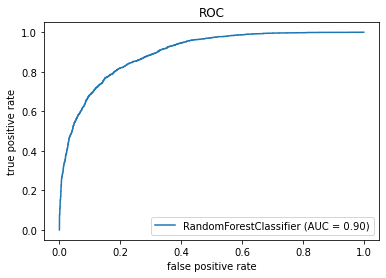

In [122]:
plot_roc_curve(rf_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

The graph shows the Area under the curve of 90 percent.

### Model saving

In [123]:
import joblib

joblib.dump(rf_mod,'MicroCreditModel.pkl')

['MicroCreditModel.pkl']